In [18]:
"""
                        ~ Notable fields/methods ~
sns
 - .scatterplot()
  -- hue
 - .countplot()

sns
 - .relplot()
  -- col, row, col_wrap, col_order, row_order, size, hue, alpha, style 
"""
import pandas
import numpy
import scipy
from scipy.stats import iqr, uniform, binom, norm, poisson, expon, t
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = '../../data'
# types: A = super center, B = discount store, C = neighborhood market
df_walmart = pandas.read_csv(f'{data_folder}/walmart_sales_subset.csv', index_col=0)
df_homeless = pandas.read_csv(f'{data_folder}/homeless.csv', index_col=0)
df_amir = pandas.read_csv(f'{data_folder}/amir_deals.csv',index_col=0)
# simplify df_amir to just 100 observations
df_amir = pandas.DataFrame(df_amir[:100])
df_mph = pandas.read_csv(f'{data_folder}/mpg.csv')

In [22]:
display(df_mph.head())
display(df_mph['cylinders'].value_counts().sort_index())
display(df_mph['model_year'].value_counts().sort_index())
display(df_mph['name'].value_counts().sort_index())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

amc ambassador brougham    1
amc ambassador dpl         1
amc ambassador sst         1
amc concord                2
amc concord d/l            1
                          ..
vw dasher (diesel)         1
vw pickup                  1
vw rabbit                  2
vw rabbit c (diesel)       1
vw rabbit custom           1
Name: name, Length: 305, dtype: int64

In [2]:
df_amir.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [10]:
display(df_amir['status'].value_counts())
display(df_amir['client'].value_counts())
display(df_amir['product'].value_counts())

Won     67
Lost    33
Name: status, dtype: int64

Current    76
New        24
Name: client, dtype: int64

Product B    41
Product A    12
Product D    10
Product C    10
Product F     9
Product I     7
Product E     4
Product N     3
Product J     2
Product G     2
Name: product, dtype: int64

In [3]:
df_homeless.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [16]:
df_walmart.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


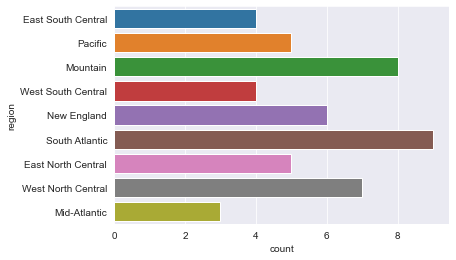

In [4]:
sns.countplot(y='region', data=df_homeless)
plt.show()

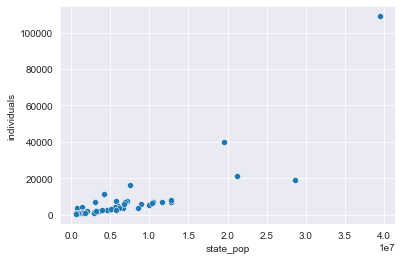

In [5]:
sns.scatterplot(y='individuals',x='state_pop',data=df_homeless)
plt.show()

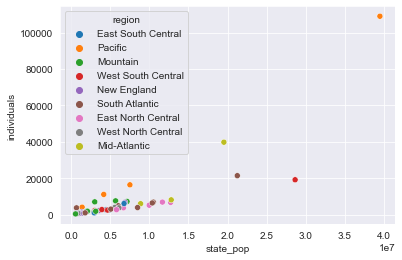

In [6]:
sns.scatterplot(y='individuals',x='state_pop',
                # hue_order=['California','Alaska'],
                # palette={'field_name':'color'}
                hue='region',data=df_homeless)
plt.show()

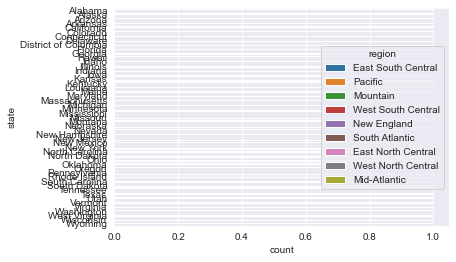

In [7]:
sns.countplot(y='state',data=df_homeless,hue='region')
plt.show()

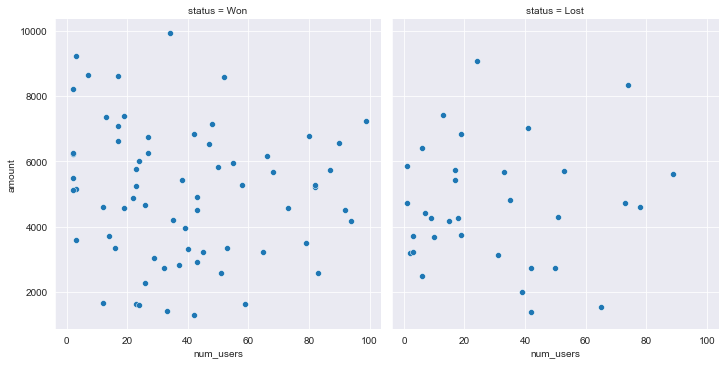

In [12]:
sns.relplot(data=df_amir,y='amount',x='num_users',col='status',kind='scatter')
plt.show()

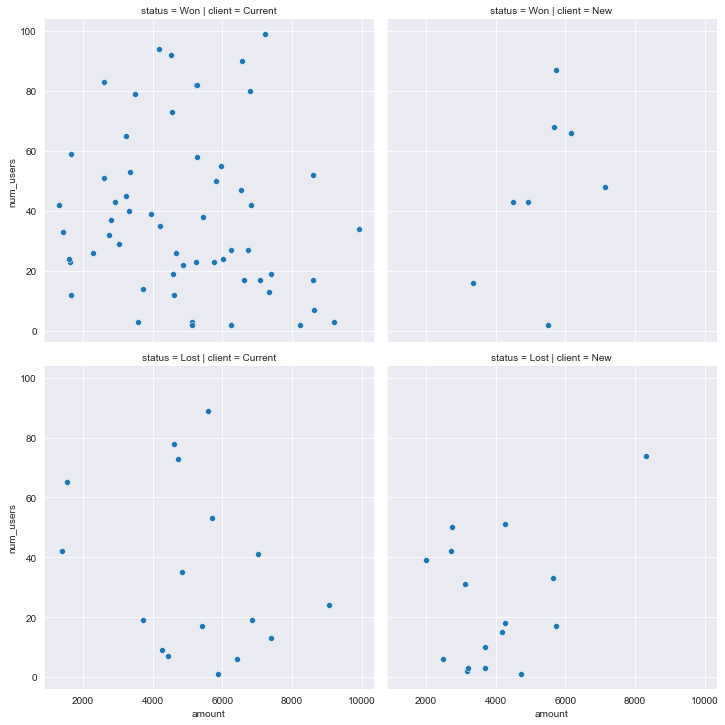

In [15]:
sns.relplot(
    kind='scatter',data=df_amir,x='amount',y='num_users',col='client',row='status',
    row_order=['Won','Lost'], col_order=['Current','New'])
plt.show()

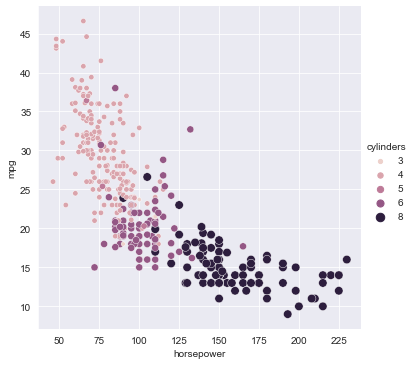

In [25]:
sns.relplot(
    kind='scatter',data=df_mph,x='horsepower',y='mpg',size='cylinders',hue='cylinders')
plt.show()